In this notebook, we build a machine learning model to predict passenger survival in the Titanic dataset.
We begin with exploratory data analysis (EDA), followed by feature engineering to improve model performance.


In [38]:
# import necessray library
import zipfile
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# loading the dataset from local
data_path = Path('data')
zip_path = data_path / 'titanic.zip'

with zipfile.ZipFile(zip_path, 'r') as z:
    name = z.namelist()
    with z.open(name[1]) as f:
        df_test = pd.read_csv(f)
    with z.open(name[2]) as f:
        df_train = pd.read_csv(f)

In [40]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
variable_names = [name for name in df_train.columns]
variable_names

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [43]:
def uni_plot(variable_names, df):
    if pd.api.types.is_numeric_dtype(df[variable_names]):
        plt.hist(df[variable_names])
        plt.xlabel(variable_names)
    elif len(df[variable_names].unique()) < 10:
        counts = df[variable_names].value_counts()
        plt.bar(counts.index, counts.values)
    else:
        return
    
    missing_rate = df[variable_names].isna().mean()
    plt.title(f'{variable_names} (missing:{missing_rate:.1%})')

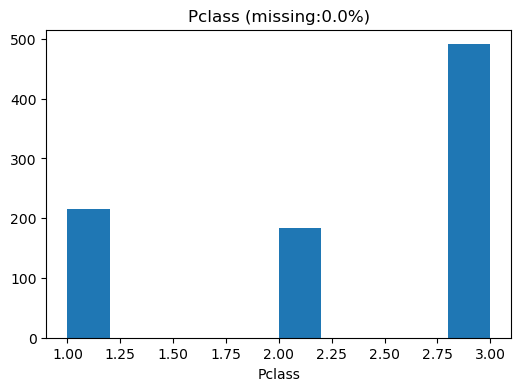

<Figure size 600x400 with 0 Axes>

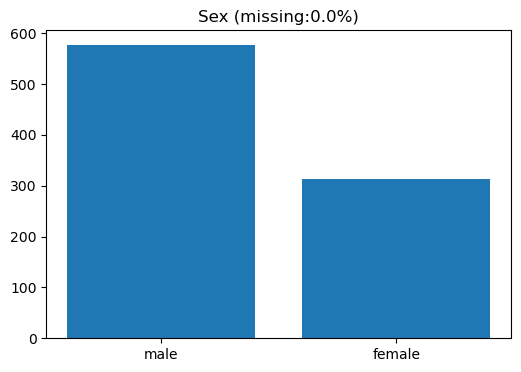

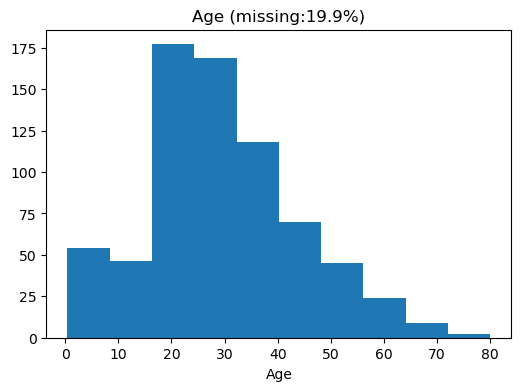

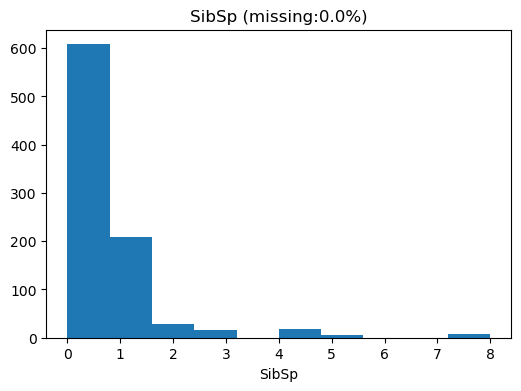

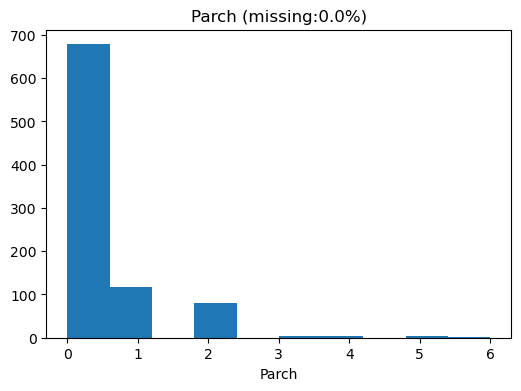

<Figure size 600x400 with 0 Axes>

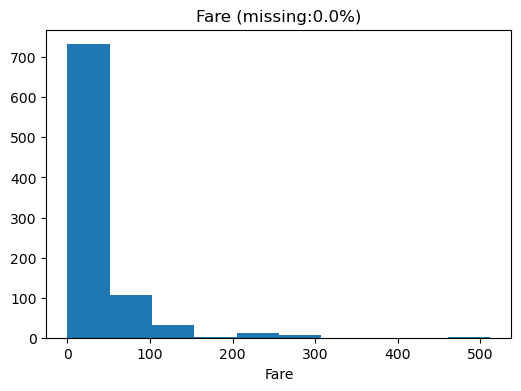

<Figure size 600x400 with 0 Axes>

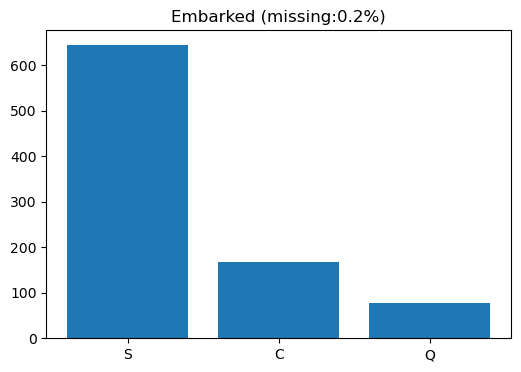

In [44]:
len_variable = len(variable_names)


for i in range(2,len_variable):
    plt.figure(figsize=(6,4))
    
    uni_plot(variable_names[i], df_train)
    

In [45]:
def bivariate_plot(col, df, cat_threshold=10):
    nunique = df[col].nunique(dropna=True)

    if nunique <= cat_threshold:
        df.groupby(col)['Survived'].mean().plot(kind='bar')
        plt.ylabel('Survival rate')
        plt.title(f'Survival rate by {col}')

    elif pd.api.types.is_numeric_dtype(df[col]):
        sns.kdeplot(data=df, x=col, hue='Survived', fill=True)
        plt.title(f'{col} distribution by survival')
    
    else:
        return


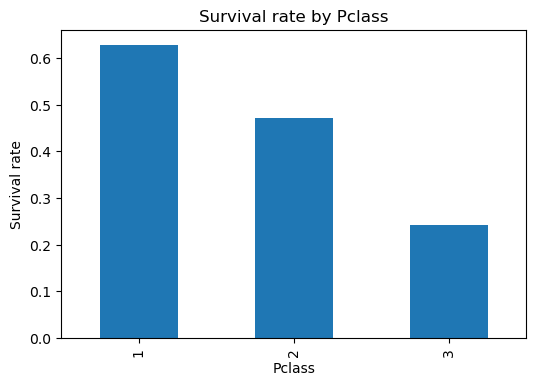

<Figure size 600x400 with 0 Axes>

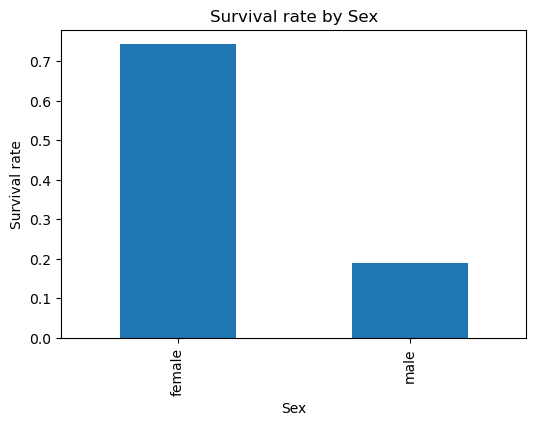

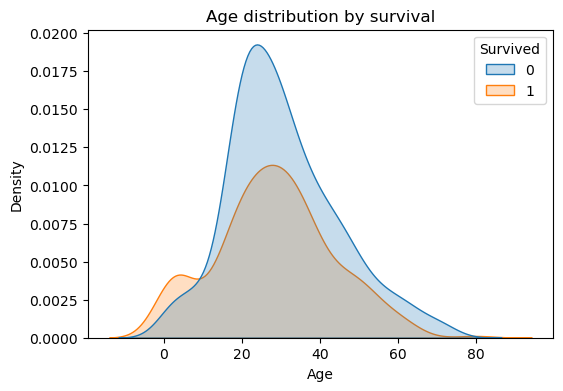

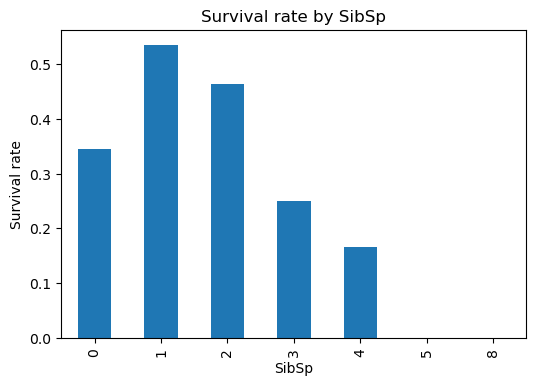

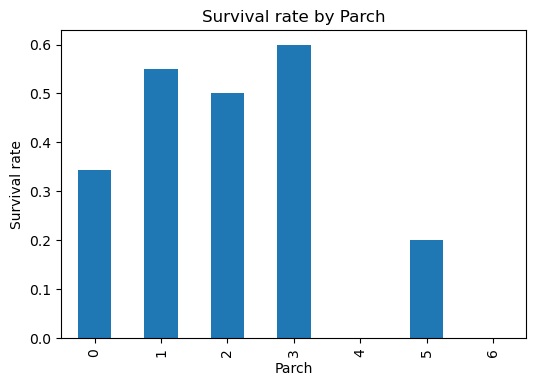

<Figure size 600x400 with 0 Axes>

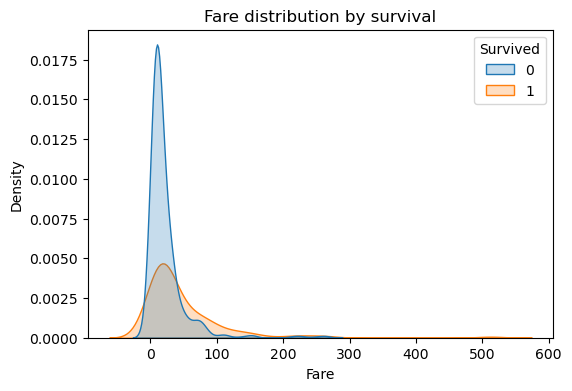

<Figure size 600x400 with 0 Axes>

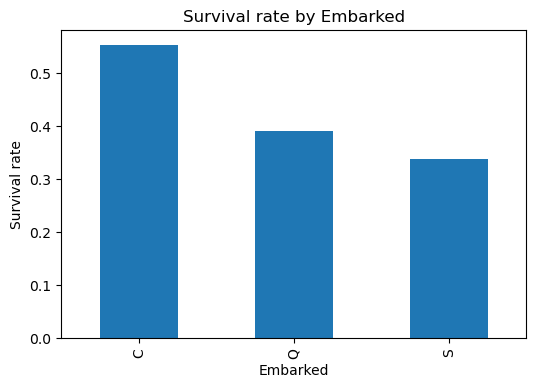

In [46]:
for i in range(2,len_variable):
    plt.figure(figsize=(6,4))
    
    bivariate_plot(variable_names[i], df_train)
    

<Axes: xlabel='Sex'>

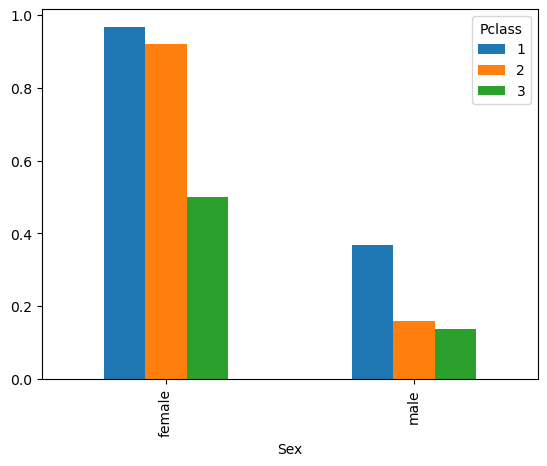

In [47]:
df_train.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar')

In [48]:
variable_names

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [49]:
len(df_train[variable_names[10]].unique()) 

148

In [50]:
length_train = len(df_train)
df = pd.concat([df_train, df_test], axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
# chech missing data
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Feature Engineering

In [52]:
# replace missing data
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [53]:
# categorical text variable 'sex' and 'embarked' into numeric
df['Sex_Pclass'] = df['Sex'] + '_' + df['Pclass'].astype(str)
df = pd.get_dummies(df, columns=['Sex_Pclass'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass_female_2,Sex_Pclass_female_3,Sex_Pclass_male_1,Sex_Pclass_male_2,Sex_Pclass_male_3
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,False,False,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,False,False,False
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,False,False,True


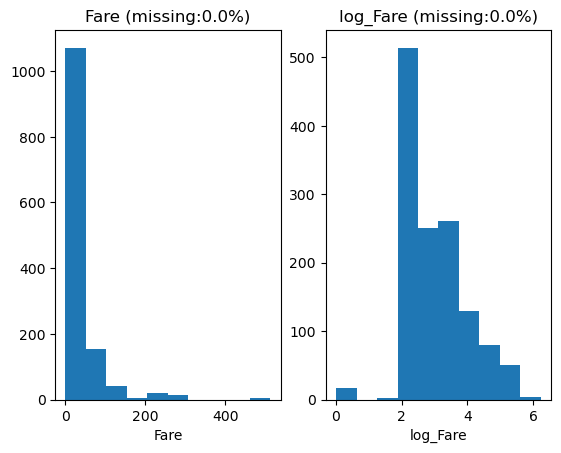

In [54]:
# fare variable log-transform
df['log_Fare'] = np.log1p(df['Fare'])

plt.subplot(1,2,1)
uni_plot('Fare', df)
plt.subplot(1,2,2)
uni_plot('log_Fare', df)

In [55]:
# create new variables
df['familysize'] = df['SibSp'] + df['Parch'] + 1
df['Alone'] = (df['familysize'] == 1)
#df['Age_bin'] = pd.cut(df['Age'], bins=[0,15,20,35,60,100], labels=False)
df['IsChild'] = (df['Age'] < 15).astype(int)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_Pclass_female_2,Sex_Pclass_female_3,Sex_Pclass_male_1,Sex_Pclass_male_2,Sex_Pclass_male_3,log_Fare,familysize,Alone,IsChild
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,False,False,False,False,True,2.110213,2,False,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,False,False,False,False,False,4.280593,2,False,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,False,True,False,False,False,2.188856,1,True,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,False,False,False,False,False,3.990834,2,False,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,False,False,False,False,True,2.202765,1,True,0


<Axes: xlabel='familysize'>

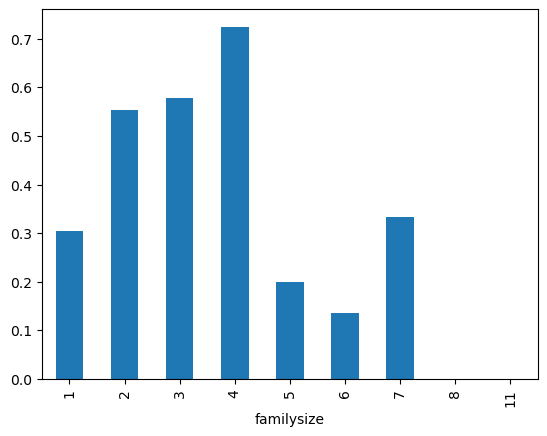

In [56]:
df.groupby('familysize')['Survived'].mean().plot(kind='bar')

In [57]:
#df['family_bin'] = pd.cut(df['familysize'], bins=[0,1,4,11], labels=False)
#df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")
#df["Title"] = df["Title"].replace(
#    ["Mlle", "Ms", "Mme"], ["Miss", "Miss", "Mrs"]
#)

#rare_titles = df["Title"].value_counts()[lambda x: x < 10].index
#df["Title"] = df["Title"].replace(rare_titles, "Rare")

#df = pd.get_dummies(df, columns=['family_bin'], drop_first=True)


In [58]:
# spliting again into train and test data
df_train_new = df.iloc[:length_train].copy()
df_test_new = df.iloc[length_train:].copy()
df_train_new.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_Pclass_female_2',
       'Sex_Pclass_female_3', 'Sex_Pclass_male_1', 'Sex_Pclass_male_2',
       'Sex_Pclass_male_3', 'log_Fare', 'familysize', 'Alone', 'IsChild'],
      dtype='object')

# Modeling

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline

remove_columns = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin','Fare','Sex','Embarked','Pclass','familysize']
target = df_train_new['Survived']
passengerId = df_test_new['PassengerId']
df_train_renew = df_train_new.drop(columns=remove_columns)
df_test_renew = df_test_new.drop(columns=remove_columns)
df_train_renew.head()

,Age,SibSp,Parch,Sex_Pclass_female_2,Sex_Pclass_female_3,Sex_Pclass_male_1,Sex_Pclass_male_2,Sex_Pclass_male_3,log_Fare,Alone,IsChild
0,22.0,1,0,False,False,False,False,True,2.110213,False,0
1,38.0,1,0,False,False,False,False,False,4.280593,False,0
2,26.0,0,0,False,True,False,False,False,2.188856,True,0
3,35.0,1,0,False,False,False,False,False,3.990834,False,0
4,35.0,0,0,False,False,False,False,True,2.202765,True,0


In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_train_renew, target, test_size=0.3, random_state=42, stratify=target)

models = {
    'logistic': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'xgb': XGBClassifier(random_state=42),
    'lgb': LGBMClassifier(random_state=42)
}

result = {}

for name, model in models.items():
    if name=='xgb':
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
    else:
        model_pipe = make_pipeline(StandardScaler(), model)
        model_pipe.fit(X_train, y_train)
        train_score = model_pipe.score(X_train, y_train)
        test_score = model_pipe.score(X_test, y_test)
    result[name] = {'train': train_score, 'test': test_score}

result = pd.DataFrame(result)
result


[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,logistic,KNN,SVC,RandomForest,xgb,lgb
train,0.826645,0.865169,0.837881,0.979133,0.961477,0.935795
test,0.817164,0.802239,0.809701,0.809701,0.783582,0.813433


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),  # sparseなら with_mean=False が安全
    ("clf", LogisticRegression(max_iter=2000))
])

param_grid = [{ "clf__penalty": ["l2"],
        "clf__solver": ["lbfgs", "liblinear"],
        "clf__C": [0.01, 0.1, 1, 3, 10],
        "clf__class_weight": [None, "balanced"],},
        {
        "clf__penalty": ["l1"],
        "clf__solver": ["liblinear"],
        "clf__C": [0.01, 0.1, 1, 3, 10],
        "clf__class_weight": [None, "balanced"],
    }]

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
print("best params:", grid.best_params_)
print("best score:", grid.best_score_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
best params: {'clf__C': 10, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
best score: 0.8074756784434204


In [62]:
import modeling
import importlib
importlib.reload(modeling)

from modeling import model_stepwise

model = LogisticRegression(random_state=42)

results = model_stepwise(X_train, y_train,model, X_test, y_test)
results

/opt/anaconda3/envs/kaggle-ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/kaggle-ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

,size,selected_predictors,accuracy,test_score
0,1,Pclass,0.682335,0.671642
1,2,"Pclass,Sex_Pclass_female_2",0.748129,0.757463
2,3,"Pclass,Sex_Pclass_female_2,Sex_Pclass_male_1",0.781755,0.798507
3,4,"Pclass,Sex_Pclass_female_2,Sex_Pclass_male_1,I...",0.791355,0.809701
4,5,"Pclass,Sex_Pclass_female_2,Sex_Pclass_male_1,I...",0.809032,0.817164
5,6,"Pclass,Sex_Pclass_female_2,Sex_Pclass_male_1,I...",0.805819,0.820896
6,7,"Pclass,Sex_Pclass_female_2,Sex_Pclass_male_1,I...",0.802594,0.813433
7,8,"Pclass,Sex_Pclass_female_2,Sex_Pclass_male_1,I...",0.804168,0.824627
8,9,"Pclass,Sex_Pclass_female_2,Sex_Pclass_male_1,I...",0.794581,0.802239
9,10,"Pclass,Sex_Pclass_female_2,Sex_Pclass_male_1,I...",0.794581,0.798507


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

log_l1 = make_pipeline(
    StandardScaler(with_mean=False),
    LogisticRegression(
        penalty="l2",
        solver="liblinear",
        class_weight='balanced',
        C=0.3,          # 0.05〜0.5 を試す
        max_iter=2000,
        random_state=42
    )
)

log_l1.fit(X_train, y_train)
print(log_l1.score(X_train, y_train))
print(log_l1.score(X_test, y_test))

prediction = log_l1.predict(df_test_renew).astype('int')
print(prediction)
submition = pd.DataFrame({'PassengerId': passengerId, 'Survived':prediction})
submition.to_csv('submit_folder/submition.csv', index=False)


0.7881219903691814
0.8097014925373134
[0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [64]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

prediction = model.predict(df_test_renew).astype('int')
print(prediction)
submition = pd.DataFrame({'PassengerId': passengerId, 'Survived':prediction})
submition.to_csv('submit_folder/submition.csv', index=False)


0.8154093097913323
0.8022388059701493
[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


/opt/anaconda3/envs/kaggle-ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [65]:
log = LogisticRegression(max_iter=2000, class_weight="balanced", C=0.3, random_state=42)
model_pipe = make_pipeline(StandardScaler(with_mean=False), log)

svc = SVC(C=1.0, gamma="scale", kernel="rbf", probability=True, random_state=42)
svc_pipe = make_pipeline(StandardScaler(with_mean=False), svc)

from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[("log", model_pipe), ("svc", svc_pipe)],
    voting="soft",
    weights=[2,1]
)
ensemble.fit(X_train, y_train)
print(ensemble.score(X_test, y_test))
prediction = ensemble.predict(df_test_renew).astype(int)


0.7985074626865671


In [66]:
submit = pd.DataFrame({'PassengerId':passengerId, 'Survived':prediction})
submit.to_csv('submit_folder/submit.csv',index=False)

In [67]:
models = {
    'Logistic': LogisticRegression(random_state=42),
    'svc': SVC(),
    'lgb': LogisticRegression(random_state=42)
}

result = {}
for name, model in models.items():
    if name=='xgb':
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
    else:
        model_pipe = make_pipeline(StandardScaler(), model)
        model_pipe.fit(X_train, y_train)
        prediction = model_pipe.predict(X_test)
    result[name] = prediction

result = pd.DataFrame(result)
result['sum'] = result.sum(axis=1)
result['Survived'] = (result.sum(axis=1)>=2).astype(int)
y_test_reset = y_test.reset_index(drop=True)
result['true'] = y_test_reset
result

,Logistic,svc,lgb,sum,Survived,true
0,0.0,0.0,0.0,0.0,0,0.0
1,0.0,0.0,0.0,0.0,0,0.0
2,0.0,0.0,0.0,0.0,0,0.0
3,0.0,0.0,0.0,0.0,0,1.0
4,0.0,0.0,0.0,0.0,0,1.0
...,...,...,...,...,...,...
263,1.0,1.0,1.0,3.0,1,1.0
264,0.0,0.0,0.0,0.0,0,1.0
265,0.0,0.0,0.0,0.0,0,0.0
266,0.0,0.0,0.0,0.0,0,0.0


In [68]:
sum(result['Survived'] == result['true'])/len(result)
result['PassengerId'] = passengerId
submit = result[['PassengerId', 'Survived']]
submit.to_csv('submit_folder/ensemble_result.csv', index=False)

In [69]:
result

,Logistic,svc,lgb,sum,Survived,true,PassengerId
0,0.0,0.0,0.0,0.0,0,0.0,892
1,0.0,0.0,0.0,0.0,0,0.0,893
2,0.0,0.0,0.0,0.0,0,0.0,894
3,0.0,0.0,0.0,0.0,0,1.0,895
4,0.0,0.0,0.0,0.0,0,1.0,896
...,...,...,...,...,...,...,...
263,1.0,1.0,1.0,3.0,1,1.0,1155
264,0.0,0.0,0.0,0.0,0,1.0,1156
265,0.0,0.0,0.0,0.0,0,0.0,1157
266,0.0,0.0,0.0,0.0,0,0.0,1158


In [108]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

# 1. 目的関数（Objective Function）を定義する
def objective(trial):
    # 探索するパラメータの範囲を指定
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    # モデルの定義
    gbm = lgb.LGBMClassifier(**param, random_state=42)
    
    # 交差検証（Cross Validation）でスコアを計算
    # ここでは5-fold CVの平均精度を返す
    score = cross_val_score(gbm, X_train, y_train, n_jobs=-1, cv=5).mean()
    return score
sampler = optuna.samplers.TPESampler(seed=42)
# 2. 最適化の実行
study = optuna.create_study(direction='maximize',sampler=sampler) # 精度を最大化したい
study.optimize(objective, n_trials=100) # 100回試行

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2025-12-22 11:18:57,544] A new study created in memory with name: no-name-874746c9-9df7-4002-a5b0-f612e9fd102e
[I 2025-12-22 11:18:58,169] Trial 0 finished with value: 0.8218322580645161 and parameters: {'lambda_l1': 2.348881295853312e-05, 'lambda_l2': 3.6010467344475385, 'num_leaves': 188, 'feature_fraction': 0.759195090518222, 'bagging_fraction': 0.4936111842654619, 'bagging_freq': 2, 'min_child_samples': 10}. Best is trial 0 with value: 0.8218322580645161.
[I 2025-12-22 11:18:58,722] Trial 1 finished with value: 0.8186322580645161 and parameters: {'lambda_l1': 0.6245760287469887, 'lambda_l2': 0.002570603566117596, 'num_leaves': 182, 'feature_fraction': 0.41235069657748147, 'bagging_fraction': 0.9819459112971965, 'bagging_freq': 6, 'min_child_samples': 25}. Best is trial 0 with value: 0.8218322580645161.
[I 2025-12-22 11:18:58,894] Trial 2 finished with value: 0.7111354838709678 and parameters: {'lambda_l1': 4.329370014459266e-07, 'lambda_l2': 4.4734294104626844e-07, 'num_leaves':

Number of finished trials: 100
Best trial: {'lambda_l1': 2.135156274943248e-07, 'lambda_l2': 0.4697517642024669, 'num_leaves': 205, 'feature_fraction': 0.7891634550644706, 'bagging_fraction': 0.9780295063626179, 'bagging_freq': 4, 'min_child_samples': 32}


In [81]:
# パラメータの重要度を可視化
optuna.visualization.plot_param_importances(study).show()

In [109]:
# 1. ベストパラメータを取得
best_params = study.best_params

# 2. そのパラメータを使ってモデルを再定義
# ※ objectiveなどはOptuna内と同じにする必要があります
best_model = lgb.LGBMClassifier(objective ='binary',
        metric= 'binary_logloss',**best_params)

# 3. 訓練データ全体で学習
best_model.fit(X_train, y_train)

# 4. スコア（Accuracy）を表示
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
predition = best_model.predict(df_test_renew)
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

[LightGBM] [Warning] lambda_l1 is set=2.135156274943248e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.135156274943248e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7891634550644706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7891634550644706
[LightGBM] [Warning] bagging_fraction is set=0.9780295063626179, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9780295063626179
[LightGBM] [Warning] lambda_l2 is set=0.4697517642024669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4697517642024669
[LightGBM] [Warning] lambda_l1 is set=2.135156274943248e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.135156274943248e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7891634550644706, colsam

In [110]:
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# objective関数の中では X_train_scaled を使う

def objective_svc(trial):
    # 探索するパラメータの範囲を指定
    params = {
        # C: 正則化の強さ。小さいほど境界が滑らか、大きいほど訓練データに忠実。
        'C': trial.suggest_float('C', 1e-3, 100, log=True),
        # kernel: 境界線の引き方。rbf（放射基底関数）が一般的。
        'kernel': trial.suggest_categorical('kernel', ['rbf', 'poly', 'sigmoid']),
        # gamma: 1つの訓練データが影響を与える範囲。
        'gamma': trial.suggest_float('gamma', 1e-3, 1e1, log=True),
    }

    model = SVC(**params, probability=True,random_state=42) # 後でアンサンブルに使うならprobability=Trueが便利
    
    # 5-fold 交差検証
    score = cross_val_score(model, X_train_scaled, y_train, n_jobs=-1, cv=5).mean()
    return score

sampler = optuna.samplers.TPESampler(seed=42)
# 最適化の実行
study_svc = optuna.create_study(direction='maximize', sampler=sampler)
study_svc.optimize(objective_svc, n_trials=50)

print("Best SVC Params:", study_svc.best_params)
print("Best SVC Score:", study_svc.best_value)

best_params = study_svc.best_params

# 2. そのパラメータを使ってモデルを再定義
# ※ objectiveなどはOptuna内と同じにする必要があります
best_model = SVC(**best_params, probability=True)

# 3. 訓練データ全体で学習
best_model.fit(X_train_scaled, y_train)

# 4. スコア（Accuracy）を表示
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)

print(f"Best Parameters: {best_params}")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

[I 2025-12-22 11:20:21,777] A new study created in memory with name: no-name-bf8dc5ef-5345-402a-b7be-83588fa2dbff
[I 2025-12-22 11:20:21,834] Trial 0 finished with value: 0.6163741935483871 and parameters: {'C': 0.07459343285726547, 'kernel': 'rbf', 'gamma': 0.004207988669606638}. Best is trial 0 with value: 0.6163741935483871.
[I 2025-12-22 11:20:21,872] Trial 1 finished with value: 0.8265548387096775 and parameters: {'C': 0.0060252157362038605, 'kernel': 'poly', 'gamma': 0.6796578090758157}. Best is trial 1 with value: 0.8265548387096775.
[I 2025-12-22 11:20:21,923] Trial 2 finished with value: 0.6163741935483871 and parameters: {'C': 0.001267425589893723, 'kernel': 'rbf', 'gamma': 0.005337032762603957}. Best is trial 1 with value: 0.8265548387096775.
[I 2025-12-22 11:20:21,961] Trial 3 finished with value: 0.6163741935483871 and parameters: {'C': 0.008260808399079604, 'kernel': 'poly', 'gamma': 0.014618962793704969}. Best is trial 1 with value: 0.8265548387096775.
[I 2025-12-22 11:2

Best SVC Params: {'C': 0.8150694343369684, 'kernel': 'rbf', 'gamma': 0.08792242567684061}
Best SVC Score: 0.8394064516129033
Best Parameters: {'C': 0.8150694343369684, 'kernel': 'rbf', 'gamma': 0.08792242567684061}
Training Accuracy: 0.8395
Test Accuracy: 0.8097


In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[("log", model_pipe), ("svc", svc_pipe)],
    voting="soft",
    weights=[2,1]
)